*The codes were developed on Windows 10, and were not tested on other machines. Anaconda 5.2.0 is chosen as a Python interpreter.*

# Probability Density and Cumulative Distribution Function

This notebook introduces the concept and methodology of implementing CDF plotting for statistical analysis.

<div class="alert alert-info">
<h4>Disclaimer</h4><p>The information on this page is based on the petroleum engineering class at the *University of Texas at Austin*, **Introduction to Geostatistics** by **Dr. Michael Pyrcz** on Fall 2018. This notebook is a work of a petrolem engineering student, <b>Eric Kim</b>.
</div>

# 0. Sample Data Set

The provided spreadsheet **PoroPermSampleData.xlsx** includes sample porosity and permeability data that will be used through out this notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

data = pd.read_excel('PoroPermSampleData.xlsx', sheet_name='Sheet1')
data.head()

,Depth,Porosity (φ),Permeability (k)
0,0.25,12.993634,265.528738
1,0.50,13.588011,116.891220
2,0.75,8.962625,136.920016
3,1.00,17.634879,216.668629
4,1.25,9.424404,131.594114


<IPython.core.display.Javascript object>


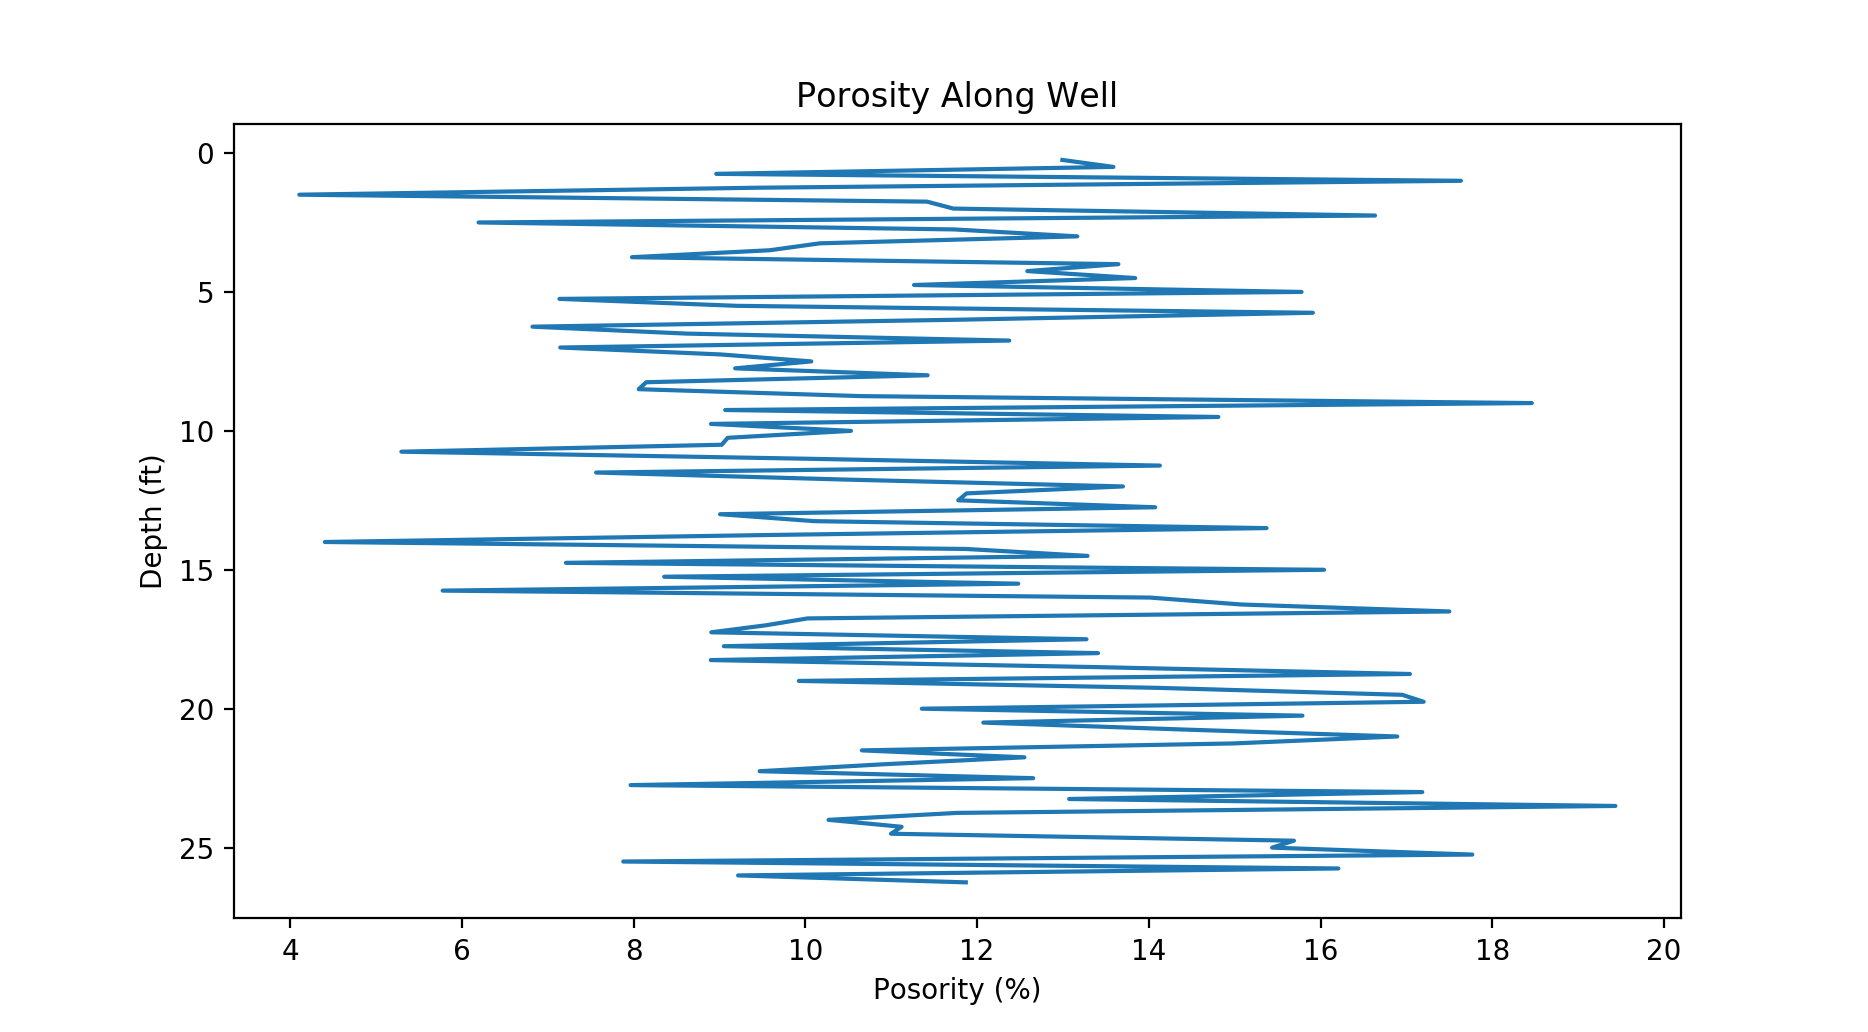

Text(0, 0.5, 'Depth (ft)')

In [4]:
porosity = np.array(data['Porosity (φ)'])
depth = np.array(data['Depth'])

fig = plt.figure()
ax = plt.axes()

ax.plot(porosity, depth);
ax.invert_yaxis()
ax.set_title('Porosity Along Well')
ax.set_xlabel('Posority (%)')
ax.set_ylabel('Depth (ft)')

# 1. Purpose - What Do We Want To Achieve?

We want to answer the following two questions:

> 1. What is the chance of this core sample having porosity of 12%?

> 2. What is the chance of this core sample having porosity of **at least** 12%?

To answer question 1 - **Probability Density Function (PDF)**

To answer question 2 - **Cumulative Distribution Function (CDF)**

# 2.  Probability Density Function (PDF)

Histogram is an example of PDF plot. It shows the probability of a sample having a value of X. Conveying information through histogram is heavily impacted by its bin size. 

When implementing histogram PDF, be aware of these factors:

- Top large bins mask information - lack resolution
- Too small bins are too noisy - lack samples in each bin for stable assessment of frequency or proportion

Something

<IPython.core.display.Javascript object>


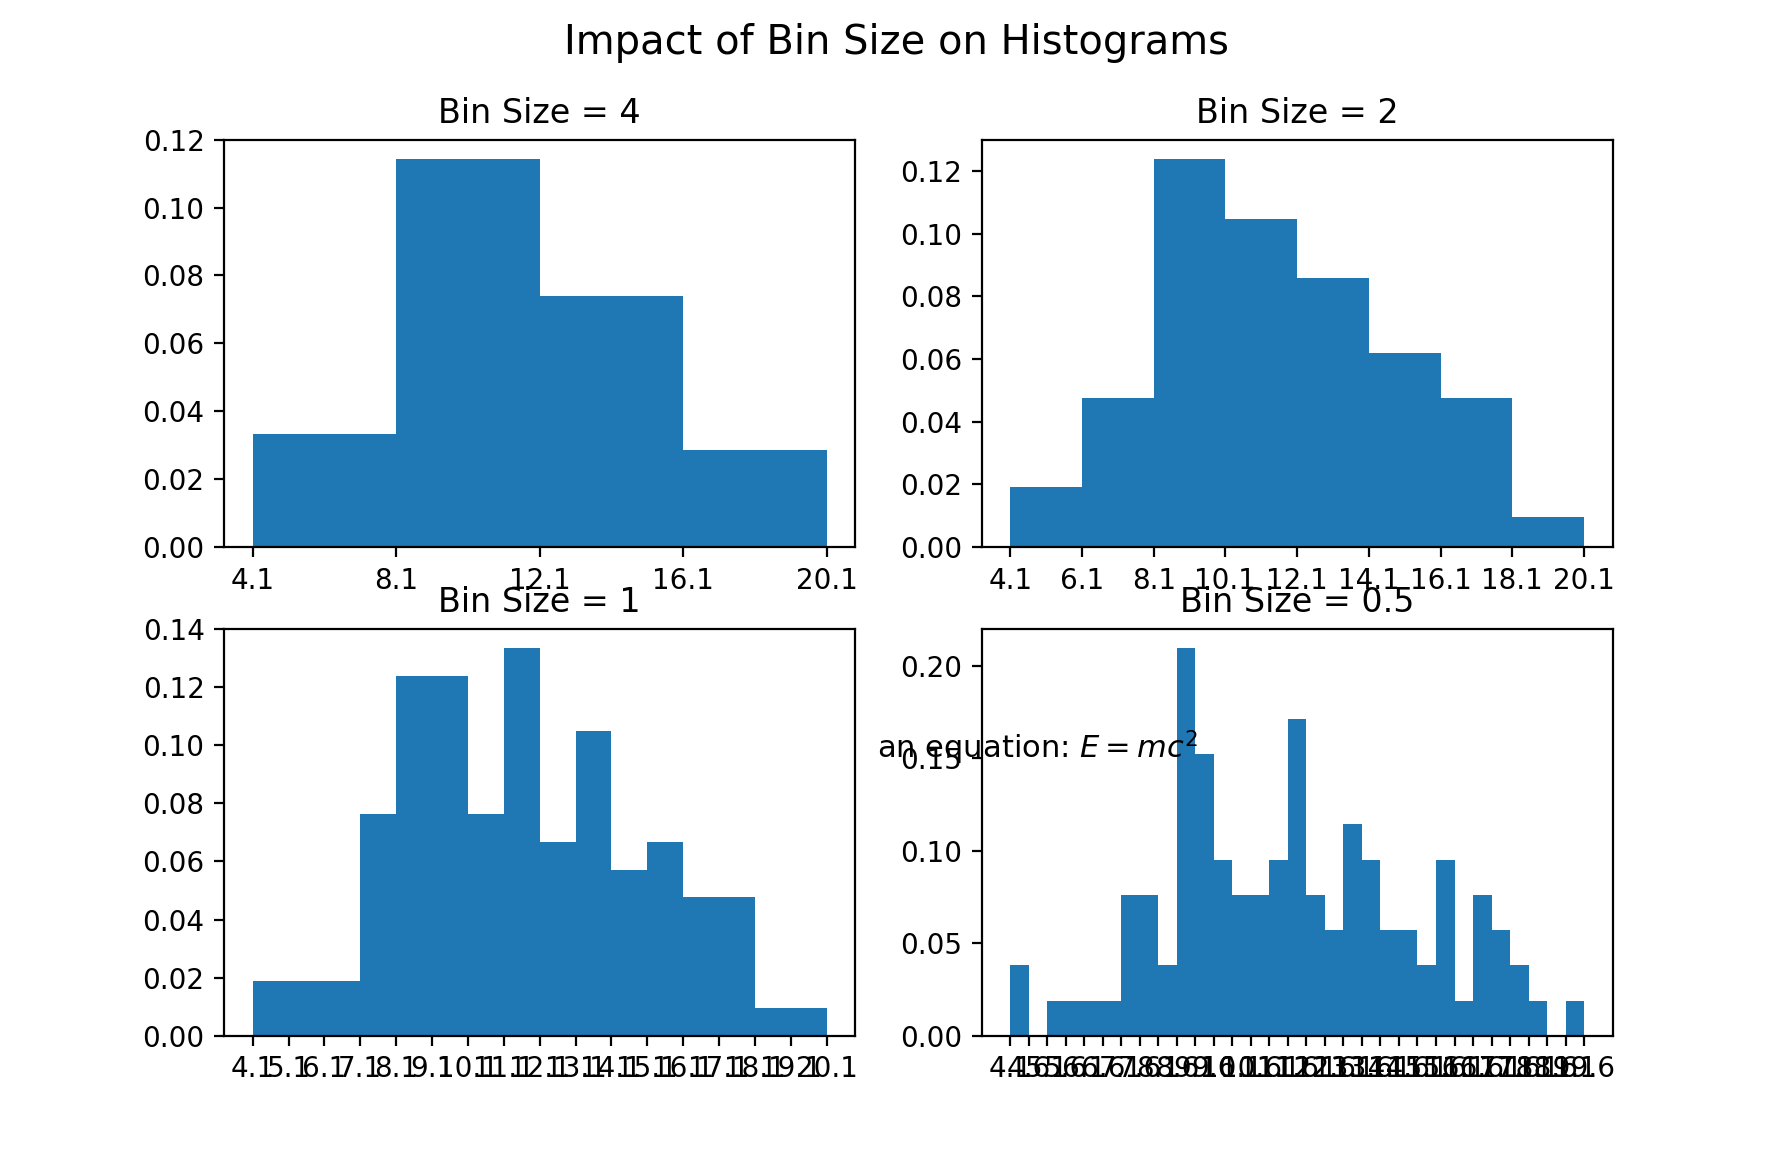

Text(0.5, 0.15, 'an equation: $E=mc^2$')

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Impact of Bin Size on Histograms', fontsize="x-large")

n, bins, patches = ax1.hist(porosity, bins=np.arange(min(porosity), max(porosity) + 4, 4), density=True)
ax1.set_xticks(bins)
ax1.set_title('Bin Size = 4')

n, bins, patches = ax2.hist(porosity, bins=np.arange(min(porosity), max(porosity) + 2, 2), density=True)
ax2.set_xticks(bins)
ax2.set_title('Bin Size = 2')

n, bins, patches = ax3.hist(porosity, bins=np.arange(min(porosity), max(porosity) + 1, 1), density=True)
ax3.set_xticks(bins)
ax3.set_title('Bin Size = 1')

n, bins, patches = ax4.hist(porosity, bins=np.arange(min(porosity), max(porosity) + 0.5, 0.5), density=True)
ax4.set_xticks(bins)
ax4.set_title('Bin Size = 0.5')

ax4.text(0.5, 0.15, r'an equation: $E=mc^2$', fontsize=11)


# 3.  Cumulative Distribution Function (CDF)

The CDF is the sum of a discrete PDF or the integral of a continuous PDF. 

These are the steps to convert PDF into CDF:

1. Sort the data in ascending order.